In [29]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/romain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Sentiment analysis:

def get_sentiment_textblob(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity  # Range: [-1, 1]
    return ((score + 1) * 2 )+ 1  # Maps to 1-5 scale

In [4]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    return ((sia.polarity_scores(text)['compound'] + 1) * 2 )+ 1

In [5]:
DATA_PATH = 'data/Dataset/BeerAdvocate/ratings.csv'

ratings_df = pd.read_csv(DATA_PATH)

rating_per_beer = ratings_df.groupby('beer_id').agg(BeerName=('beer_name', 'min'), Count=('review', 'size'), Mean=('rating', 'mean')).sort_values(by='Mean')

In [6]:
ratings_df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393027,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True
8393028,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True
8393029,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True
8393030,Nut Brown Ale,19140,Summit Station Restaurant & Brewery,885,English Brown Ale,5.3,1341741600,Redsox1539,redsox1539.683632,NaN,NaN,NaN,NaN,NaN,3.50,NaN,False


In [7]:
rating_per_beer

,BeerName,Count,Mean
beer_id,,,
141122,Hobb Knobb Blonde,1,1.0
32505,Wasabi Dry,1,1.0
10556,Elysium,1,1.0
271190,Watermelon Wheat,1,1.0
103421,Trendy Cream Ale,1,1.0
...,...,...,...
101220,What's Kraken,1,5.0
181754,Summer Shandy,1,5.0
126526,Blood Saison,1,5.0


In [8]:
merge_df = ratings_df.merge(rating_per_beer, how='inner', right_index=True, left_on='beer_id')
merge_df.drop('BeerName', axis=1, inplace=True)
merge_df = merge_df.dropna()
merge_df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,Count,Mean
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,1,2.880000
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,4,3.845000
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,4,3.845000
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True,4,3.845000
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,4,3.845000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393026,Irvington Pale Ale,19141,Summit Station Restaurant & Brewery,885,American Pale Ale (APA),6.8,1100516400,ecoboy,ecoboy.1641,3.50,3.00,3.50,3.00,3.5,3.18,"It may say APA on this site, but talking to th...",True,3,3.596667
8393027,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True,3,2.713333
8393028,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True,3,2.713333
8393029,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True,3,2.713333


In [9]:
merge_df_sentiment = merge_df.sample(100).copy()
merge_df_sentiment['sentiment_textblob'] = merge_df_sentiment['text']

merge_df_sentiment['sentiment_textblob']  = merge_df_sentiment['sentiment_textblob'].apply(get_sentiment_textblob)

merge_df_sentiment['sentiment_vader'] = merge_df_sentiment['text']

merge_df_sentiment['sentiment_vader']  = merge_df_sentiment['sentiment_vader'].apply(get_sentiment_vader)


#for index, row in merge_df_sentiment.iterrows():
#    sentiment_score = get_sentiment_textblob(row['text'])
#    merge_df_sentiment.loc[index, 'sentiment_rating'] = sentiment_score

merge_df_sentiment

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,palate,taste,overall,rating,text,review,Count,Mean,sentiment_textblob,sentiment_vader
6775755,Arcadia B-Craft Black IPA,60469,Arcadia Brewing Company,454,American Black Ale,8.5,1345370400,hopsolutely,hopsolutely.513175,4.00,...,3.50,4.00,4.00,3.95,"Pours a clear, near-black with red at the edge...",True,344,3.855465,3.181429,4.9428
2155770,8 Ball Stout,5045,Lost Coast Brewery and Cafe,256,Oatmeal Stout,6.3,1200481200,HardcoreKeith,hardcorekeith.157431,3.00,...,4.00,4.00,4.50,4.04,Pours thick and black into a pint glass. No he...,True,1083,3.829723,3.073269,2.0304
3442094,4Beans,183169,Sixpoint Brewery,10607,Baltic Porter,10.0,1440842400,Rifugium,rifugium.304205,3.75,...,3.25,3.50,3.25,3.38,"Can, poured into a Sixpoint mini snifter.Dark ...",True,966,4.145342,3.248718,4.9130
3207086,UFO Raspberry Hefeweizen,28672,Harpoon Brewery & Beer Hall,98,Fruit / Vegetable Beer,4.8,1206529200,ledemie,ledemie.118593,4.00,...,4.00,4.00,4.00,4.12,"this was a good fruit beer, I do not really ca...",True,785,3.577771,3.522222,4.4630
3263906,Exit 16,56716,Flying Fish Brewing Company,339,American Double / Imperial IPA,8.2,1354532400,justintcoons,justintcoons.333911,4.50,...,4.50,4.50,4.50,4.50,Poured into a tulip.AppearanceHazy pale gold w...,True,846,4.082530,3.600667,4.8546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908947,Trappistes Rochefort 10,645,Brasserie de Rochefort,207,Quadrupel (Quad),11.3,1298804400,OttoPeeWee,ottopeewee.317280,4.00,...,4.00,5.00,4.00,4.64,Legendary. In the same vein as St. Bernardus A...,True,9228,4.505450,3.369804,4.9198
897423,Heineken Lager Beer,246,Heineken Nederland B.V.,81,Euro Pale Lager,5.0,1450954800,Bill4515,bill4515.935365,5.00,...,5.00,4.75,4.50,4.74,Man I like Heineken (get the movie reference? ...,True,4932,2.716681,3.720000,4.7908
5588070,Kentucky Pumpkin Barrel Ale,99058,Alltech's Lexington Brewing and Distilling Co.,430,Pumpkin Ale,10.0,1382263200,JohnnyHopps,johnnyhopps.469942,3.75,...,3.50,3.50,3.50,3.58,"Appearance - Poured into a glass, the beer was...",True,507,3.685247,3.368889,4.4192
6880045,Crooked Theratree,240071,Dark Horse Brewing Company,1471,American Black Ale,8.5,1479985200,Czequershuus,czequershuus.780649,3.75,...,3.50,3.00,3.25,3.27,This beer pours a dark chocolate color with a ...,True,43,3.980698,3.209722,4.6542


In [10]:
#merge_df_sentiment.to_csv('sentiment_rating_and_count.csv')

In [11]:
corr = merge_df_sentiment['sentiment_vader'].corr(merge_df_sentiment['sentiment_textblob'])
print("Correlation:", corr)

corr = merge_df_sentiment['sentiment_vader'].corr(merge_df_sentiment['overall'])
print("Correlation:", corr)

corr = merge_df_sentiment['overall'].corr(merge_df_sentiment['sentiment_textblob'])
print("Correlation:", corr)

Correlation: 0.28352988657080186
Correlation: 0.2912101187612733
Correlation: 0.2812088442485485


In [12]:
merge_df_sentiment = merge_df_sentiment.sort_values(by='overall', ascending=True)

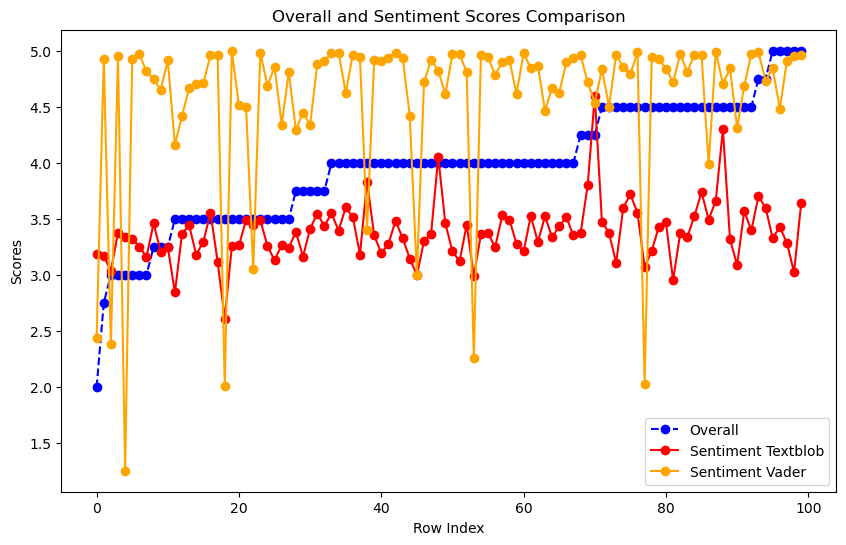

In [13]:
plt.figure(figsize=(10, 6))

x = np.arange(len(merge_df_sentiment.index))
plt.plot(x, merge_df_sentiment['overall'], label='Overall', marker='o', color='b', linestyle='--')

plt.plot(x, merge_df_sentiment['sentiment_textblob'], label='Sentiment Textblob', marker='o', color='r', linestyle='-')

plt.plot(x, merge_df_sentiment['sentiment_vader'], label='Sentiment Vader', marker='o', color='orange', linestyle='-')

# Ajouter des labels et un titre
plt.xlabel('Row Index')
plt.ylabel('Scores')
plt.title('Overall and Sentiment Scores Comparison')

# Légende
plt.legend()

# Afficher le graphique
plt.show()

In [23]:
## Checking corr between sentiment in name a rating

cleaned_rating_per_beer = rating_per_beer.dropna()
cleaned_rating_per_beer = cleaned_rating_per_beer[cleaned_rating_per_beer['Count'] > 500]
cleaned_rating_per_beer

,BeerName,Count,Mean
beer_id,,,
52480,Budweiser Select 55,575,1.597409
1524,Natural Light,2104,1.689358
2947,Keystone Ice,716,1.701913
653,Natural Ice,1396,1.764434
43043,Miller 64,788,1.794201
...,...,...,...
87846,King Julius,765,4.746837
110635,Hunahpu's Imperial Stout - Double Barrel Aged,1470,4.748163
136936,Good Morning,1023,4.786970


In [25]:
sentiment_rating_per_beer = cleaned_rating_per_beer.copy()
sentiment_rating_per_beer['beer_name_sentiment_vader'] = (cleaned_rating_per_beer['BeerName'].apply(get_sentiment_vader))
sentiment_rating_per_beer['beer_name_sentiment_blob'] = (cleaned_rating_per_beer['BeerName'].apply(get_sentiment_textblob))
sentiment_rating_per_beer

,BeerName,Count,Mean,beer_name_sentiment_vader,beer_name_sentiment_blob
beer_id,,,,,
52480,Budweiser Select 55,575,1.597409,3.0000,3.0
1524,Natural Light,2104,1.689358,3.7224,3.5
2947,Keystone Ice,716,1.701913,3.0000,3.0
653,Natural Ice,1396,1.764434,3.7224,3.2
43043,Miller 64,788,1.794201,3.0000,3.0
...,...,...,...,...,...
87846,King Julius,765,4.746837,3.0000,3.0
110635,Hunahpu's Imperial Stout - Double Barrel Aged,1470,4.748163,3.3558,2.9
136936,Good Morning,1023,4.786970,3.8808,4.4


In [27]:
corr = sentiment_rating_per_beer['beer_name_sentiment_vader'].corr(sentiment_rating_per_beer['beer_name_sentiment_blob'])
print("Correlation:", corr)

corr = sentiment_rating_per_beer['beer_name_sentiment_vader'].corr(sentiment_rating_per_beer['Mean'])
print("Correlation:", corr)

corr = sentiment_rating_per_beer['beer_name_sentiment_blob'].corr(sentiment_rating_per_beer['Mean'])
print("Correlation:", corr)

Correlation: 0.512652438908408
Correlation: -0.0150015595102542
Correlation: -0.09090585957911328


In [32]:
print(stats.pearsonr(sentiment_rating_per_beer['beer_name_sentiment_vader'], sentiment_rating_per_beer['Mean']))
print(stats.spearmanr(sentiment_rating_per_beer['beer_name_sentiment_vader'], sentiment_rating_per_beer['Mean']))

PearsonRResult(statistic=np.float64(-0.015001559510254218), pvalue=np.float64(0.4133910895241127))
SignificanceResult(statistic=np.float64(0.029011398896106207), pvalue=np.float64(0.11363747726504786))
